In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the training set
dataset_train = pd.read_csv('M:\Deep Learning A-Z\Volume 1 - Supervised Deep Learning\Part 3 - Recurrent Neural Networks (RNN)\Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)


In [4]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [5]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [13]:
# Part 2 - Building the RNN
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [14]:
# Initialising the RNN
regressor = Sequential()

In [15]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [16]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [17]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [20]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [21]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [22]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [23]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0745
Epoch 2/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0079
Epoch 3/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0073
Epoch 4/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0060
Epoch 5/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0062
Epoch 6/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0052
Epoch 7/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0049
Epoch 8/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0049
Epoch 9/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0050
Epoch 10/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0048
Epoch 11/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0041
Epoch 12/100
1198/1198 [==============================] - 6s 5ms/step - 

1198/1198 [==============================] - 6s 5ms/step - loss: 0.0016
Epoch 98/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0016
Epoch 99/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0015
Epoch 100/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0016


In [24]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [25]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

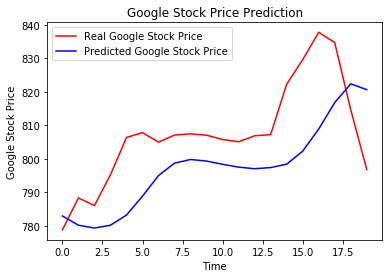

In [26]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [27]:
# Part-4 Evaluating RNN
import math
from sklearn.metrics import mean_squared_error
rmse=math.sqrt(mean_squared_error(real_stock_price,predicted_stock_price))

In [32]:
#Percentage of rmse
rmse/837.81

0.018760569188432483